# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading Dataset

In [2]:
np.random.seed(42)
class1_x = np.random.uniform(1, 3, 50)
class1_y = np.random.uniform(4, 6, 50)

class2_x = np.random.uniform(2, 4, 50)
class2_y = np.random.uniform(1, 3, 50)

class3_x = np.random.uniform(5, 7, 50)
class3_y = np.random.uniform(4, 6, 50)

# Combine data into a single DataFrame
data = {
    'X1': np.concatenate([class1_x, class2_x, class3_x]),
    'X2': np.concatenate([class1_y, class2_y, class3_y]),
    'Class': [0] * 50 + [1] * 50 + [2] * 50  # Modified class labels
}

df = pd.DataFrame(data)

# Save or print the data
print(df.head(10))  # Show the first 10 rows

# Optionally, save the data to a CSV file
df.to_csv("non_linear_data.csv", index=False)

# Load the CSV file
data = pd.read_csv("non_linear_data.csv")

         X1        X2  Class
0  1.749080  5.939169      0
1  2.901429  5.550266      0
2  2.463988  5.878998      0
3  2.197317  5.789655      0
4  1.312037  5.195800      0
5  1.311989  5.843748      0
6  1.116167  4.176985      0
7  2.732352  4.391966      0
8  2.202230  4.090455      0
9  2.416145  4.650661      0


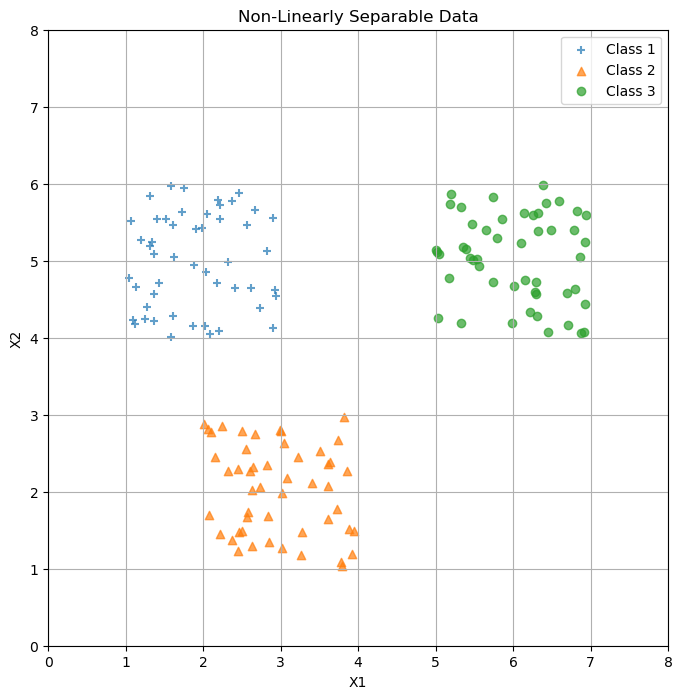

In [3]:
X = np.concatenate([np.column_stack((class1_x, class1_y)),
                    np.column_stack((class2_x, class2_y)),
                    np.column_stack((class3_x, class3_y))])

y = np.array([0]*50 + [1]*50 + [2]*50)  # Correct class labels

# Plot the data
plt.figure(figsize=(8, 8))
plt.scatter(class1_x, class1_y, label='Class 1', alpha=0.7, marker='+')
plt.scatter(class2_x, class2_y, label='Class 2', alpha=0.7, marker='^')
plt.scatter(class3_x, class3_y, label='Class 3', alpha=0.7, marker='o')
plt.title("Non-Linearly Separable Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.legend()
plt.grid(True)
plt.show()

# Defining 3-hidden layer Neural Network

In [4]:
class NeuralNetwork:
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons1 = 32
        hiddenLayerNeurons2 = 16
        hiddenLayerNeurons3 = 8
        outLayerNeurons = 3

        self.learning_rate = 0.01
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons1)
        self.W_H2 = np.random.randn(hiddenLayerNeurons1, hiddenLayerNeurons2)
        self.W_H3 = np.random.randn(hiddenLayerNeurons2, hiddenLayerNeurons3)
        self.W_OH = np.random.randn(hiddenLayerNeurons3, outLayerNeurons)

    def relu(self, x, der=False):
        if der:
            return (x > 0).astype(float)
        return np.maximum(0, x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        hidden_input1 = np.dot(X, self.W_HI)
        self.hidden_output1 = self.relu(hidden_input1)

        hidden_input2 = np.dot(self.hidden_output1, self.W_H2)
        self.hidden_output2 = self.relu(hidden_input2)

        hidden_input3 = np.dot(self.hidden_output2, self.W_H3)
        self.hidden_output3 = self.relu(hidden_input3)

        output_input = np.dot(self.hidden_output3, self.W_OH)
        pred = self.softmax(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error

        hidden_error3 = output_delta.dot(self.W_OH.T) * self.relu(self.hidden_output3, der=True)
        hidden_delta3 = self.learning_rate * hidden_error3

        hidden_error2 = hidden_delta3.dot(self.W_H3.T) * self.relu(self.hidden_output2, der=True)
        hidden_delta2 = self.learning_rate * hidden_error2

        hidden_error1 = hidden_delta2.dot(self.W_H2.T) * self.relu(self.hidden_output1, der=True)
        hidden_delta1 = self.learning_rate * hidden_error1

        self.W_HI += X.T.dot(hidden_delta1)
        self.W_H2 += self.hidden_output1.T.dot(hidden_delta2)
        self.W_H3 += self.hidden_output2.T.dot(hidden_delta3)
        self.W_OH += self.hidden_output3.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

# Plotting Error

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2527.54it/s]


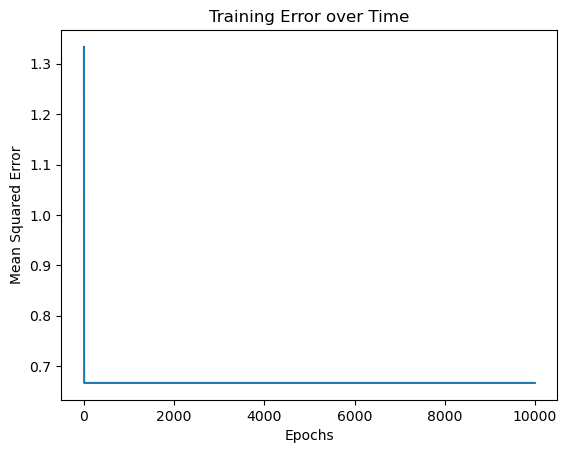

In [5]:
from tqdm import tqdm
X = np.column_stack((df['X1'], df['X2']))

Y = np.zeros((len(df), 3))
for i, label in enumerate(df['Class']):
    Y[i, label] = 1
NN = NeuralNetwork()
err = []

for i in tqdm(range(10000)):
    NN.train(X, Y)
    predictions = NN.feedForward(X)
    loss = np.mean(np.sum((Y - predictions) ** 2, axis=1))
    err.append(loss)

plt.plot(err)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training Error over Time')
plt.show()

# Visualizing Decision Boundary

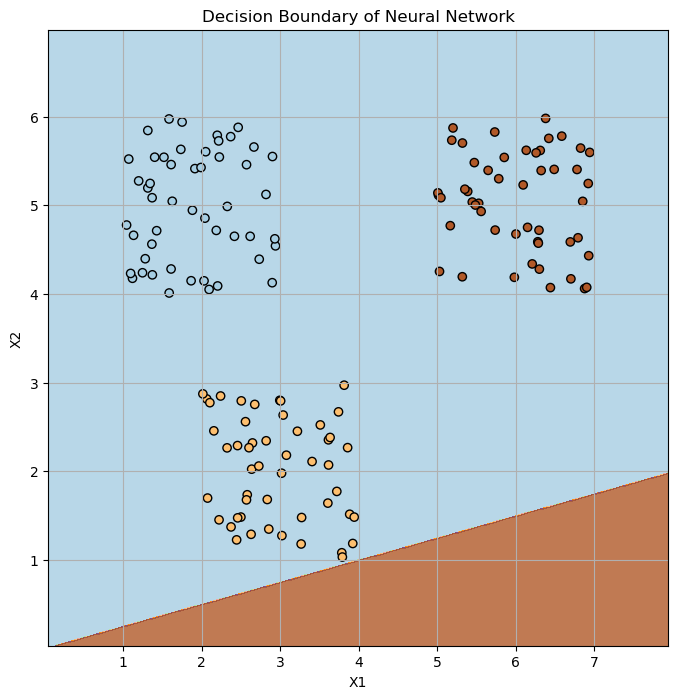

In [8]:
# Define a function to plot the decision boundary
def plot_decision_boundary(X, y, model, resolution=0.01):
    # Create a grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    # Flatten the grid and predict class probabilities
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.feedForward(grid)
    Z = np.argmax(probs, axis=1)  # Get the predicted class for each point
    Z = Z.reshape(xx.shape)  # Reshape back to grid format
    
    # Plot the decision boundary
    plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=np.argmax(y, axis=1), edgecolor='k', cmap=plt.cm.Paired)
    plt.title("Decision Boundary of Neural Network")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.grid(True)
    plt.show()

# Visualize the decision boundary
plot_decision_boundary(X, Y, NN)
